# PROYECTO 1. 
**Grupo 6**

Autores: Elena, Fer, Rubén

> Objetivo principal: 
- Analizar cohortes de usuarios definidos por el mes de creación de su primer adelanto en efectivo. 
- Seguir la evolución mensual de las métricas clave para estas cohortes (lo que permitirá a IronHack Payments obtener valiosas perspectivas sobre el comportamiento de los usuarios y el rendimiento de sus servicios financieros.)

> Métricas a Analizar

Calcularás y analizarás las siguientes métricas para cada cohorte:

1. **Frecuencia de Uso del Servicio:** Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.
2. **Tasa de Incidentes:** Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.
3. **Ingresos Generados por la Cohorte:** Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.
4. **Nueva Métrica Relevante:** Proponer y calcular una nueva métrica relevante que brinde perspectivas adicionales sobre el comportamiento de los usuarios o el rendimiento de los servicios de IronHack Payments.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from pathlib import Path
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

## Load data (.csv)

In [3]:
inputs_path = Path("project_dataset")
df_cash = pd.read_csv(inputs_path / "extract - cash request - data analyst.csv")
df_fees = pd.read_csv(inputs_path / "extract - fees - data analyst - .csv")

## EDA (Exploratory Data Analysis) - df_cash

In [4]:
df_cash.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


### CASH Dataframe (df_cash)

In [5]:
df_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

#### Find NaN

In [6]:
#  Encontrar NaN
df_cash.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [7]:
# df_cash_nan = df_cash[df_cash['user_id'].isnull().values]
# df_cash_nan

In [8]:
# df_cash = df_cash.dropna(subset='user_id')
# df_cash

In [9]:
# NaN user_id
df_cash[~(df_cash.deleted_account_id.isnull().values)]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
19,545,100.0,rejected,2020-01-29 13:53:03.343598+00,2020-02-08 06:21:16.156719+00,NaN,2020-01-29 14:39:11.563872+00,304.0,2020-02-28 13:53:03.343216+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
21,613,100.0,rejected,2020-02-05 17:37:56.852948+00,2020-02-08 06:21:16.15229+00,NaN,2020-02-06 12:48:09.880702+00,304.0,2020-03-08 17:37:56.842421+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
25,84,100.0,rejected,2019-12-11 07:30:42.567035+00,2020-01-10 16:58:06.837117+00,NaN,2020-01-10 16:58:06.830329+00,91.0,2020-01-10 07:30:42.567035+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23922,23989,25.0,money_back,2020-10-24 10:22:05.934286+00,2020-12-18 13:14:25.891447+00,NaN,NaN,29610.0,2020-11-03 10:22:40.194197+00,NaN,2020-11-16 02:57:54.235926+00,instant,2020-10-24 10:22:40.194197+00,completed,2020-11-13 22:40:42.99552+00,2020-11-16 02:57:54.252045+00
23925,22913,100.0,money_back,2020-10-21 22:00:18.904317+00,2020-12-18 13:11:15.976246+00,NaN,NaN,30404.0,2020-11-09 23:51:00+00,2020-10-23,2020-11-10 19:51:45.285165+00,instant,2020-10-21 22:00:45.462413+00,NaN,NaN,NaN
23929,22641,100.0,money_back,2020-10-21 00:46:36.5907+00,2020-12-18 13:15:45.384787+00,NaN,NaN,29911.0,2020-12-06 23:00:00+00,2020-10-22,2020-12-10 23:00:00+00,instant,2020-10-21 00:47:58.826568+00,NaN,NaN,NaN
23940,23832,25.0,money_back,2020-10-23 22:56:09.02721+00,2020-12-18 13:11:28.776102+00,NaN,NaN,29803.0,2020-12-04 23:00:00+00,2020-10-24,2020-12-08 23:00:00+00,instant,2020-10-23 22:56:42.839064+00,NaN,NaN,NaN


In [10]:
df_cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


In [11]:
df_cash['new_user_id'] = df_cash['user_id'].fillna(df_cash['deleted_account_id']).astype(int)

#### value_counts() and unique()

In [12]:
for col in df_cash.columns:
    print(f"'{col}' value_counts: {df_cash[col].value_counts()}")
    print(f"'{col}' unique: {df_cash[col].unique()}")
    print(f"'{col}' len(unique): {len(df_cash[col].unique())}\n")

'id' value_counts: id
19886    1
5        1
19774    1
26021    1
22957    1
        ..
3512     1
2145     1
1594     1
10       1
7        1
Name: count, Length: 23970, dtype: int64
'id' unique: [    5    70     7 ... 22357 20256 19886]
'id' len(unique): 23970

'amount' value_counts: amount
100.0    16094
50.0      5304
25.0      1276
80.0       267
60.0       190
70.0       151
20.0       132
30.0       114
40.0       100
90.0        91
10.0        57
200.0       25
95.0        21
1.0         19
75.0        18
45.0        15
55.0        14
99.0        12
65.0        12
15.0        10
85.0         9
35.0         9
5.0          6
2.0          3
98.0         2
28.0         2
22.0         2
11.0         2
94.0         1
150.0        1
67.0         1
72.0         1
31.0         1
8.0          1
86.0         1
97.0         1
39.0         1
49.0         1
36.0         1
54.0         1
24.0         1
Name: count, dtype: int64
'amount' unique: [100.  99.  90.   1.  70.  25.  50.  20.  60.  8

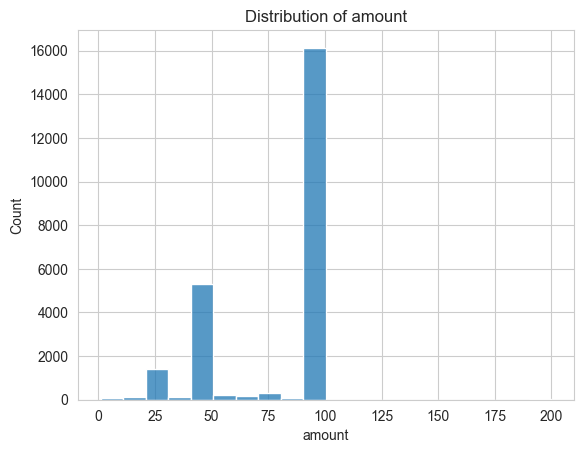

In [13]:
sns.histplot(data=df_cash, x='amount', bins=20)
plt.title("Distribution of amount")
plt.show()

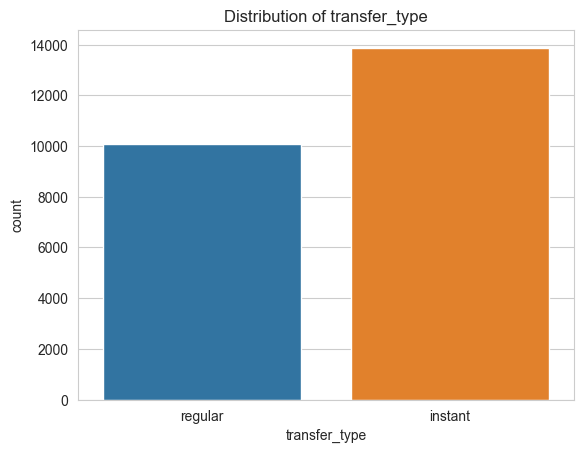

In [14]:
sns.countplot(data=df_cash, x='transfer_type', hue='transfer_type', palette='tab10')
plt.title("Distribution of transfer_type")
plt.show()

In [43]:
df_cash['created_at'].dt.strftime('%m-%Y')

0        12-2019
1        12-2019
2        12-2019
3        12-2019
4        05-2020
          ...   
23965    10-2020
23966    10-2020
23967    10-2020
23968    10-2020
23969    10-2020
Name: created_at, Length: 23970, dtype: object

In [261]:
df_cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,new_user_id,month_year,month_name,year
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,804,2019-12,December,2019
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,231,2019-12,December,2019
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,191,2019-12,December,2019
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,761,2019-12,December,2019
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,7686,2020-05,May,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,13681,2020-10,October,2020
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,30367,2020-10,October,2020
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,82122,2020-10,October,2020
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN,64517,2020-10,October,2020


In [15]:
# Convertimos el 'created_at' de string a datetime
df_cash['created_at'] = pd.to_datetime(df_cash['created_at'])
# Obtenemos una nueva columna 'mes_año'
df_cash['month_year'] = df_cash['created_at'].dt.to_period('M').astype(str)
df_cash['month_name'] = df_cash['created_at'].dt.month_name()
df_cash['year'] = df_cash['created_at'].dt.year
df_cash[['created_at', 'month_year', 'month_name', 'year']]

C:\Users\emartin4\AppData\Local\Temp\ipykernel_28436\2463115334.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cash['month_year'] = df_cash['created_at'].dt.to_period('M')


,created_at,month_year,month_name,year
0,2019-12-10 19:05:21.596873+00:00,2019-12,December,2019
1,2019-12-10 19:50:12.347780+00:00,2019-12,December,2019
2,2019-12-10 19:13:35.825460+00:00,2019-12,December,2019
3,2019-12-10 19:16:10.880172+00:00,2019-12,December,2019
4,2020-05-06 09:59:38.877376+00:00,2020-05,May,2020
...,...,...,...,...
23965,2020-10-12 13:54:11.686225+00:00,2020-10,October,2020
23966,2020-10-27 14:41:25.734910+00:00,2020-10,October,2020
23967,2020-10-20 07:58:04.006937+00:00,2020-10,October,2020
23968,2020-10-10 05:40:55.700422+00:00,2020-10,October,2020


In [16]:
df_cash_m1 = df_cash[['id', 'new_user_id', 'status', 'created_at', 'month_year', 'month_name', 'year']]
df_cash_m1.head()

,id,new_user_id,status,created_at,month_year,month_name,year
0,5,804,rejected,2019-12-10 19:05:21.596873+00:00,2019-12,December,2019
1,70,231,rejected,2019-12-10 19:50:12.347780+00:00,2019-12,December,2019
2,7,191,rejected,2019-12-10 19:13:35.825460+00:00,2019-12,December,2019
3,10,761,rejected,2019-12-10 19:16:10.880172+00:00,2019-12,December,2019
4,1594,7686,rejected,2020-05-06 09:59:38.877376+00:00,2020-05,May,2020


In [17]:
df_cash_m1.sort_values(['new_user_id', 'id'], inplace=True)

C:\Users\emartin4\AppData\Local\Temp\ipykernel_28436\2100630214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cash_m1.sort_values(['new_user_id', 'id'], inplace=True)


In [18]:
df_cash_m1['n_transaction'] = df_cash_m1.groupby('new_user_id').cumcount() + 1
df_cash_m1

C:\Users\emartin4\AppData\Local\Temp\ipykernel_28436\1687452380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cash_m1['n_transaction'] = df_cash_m1.groupby('new_user_id').cumcount() + 1


,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction
538,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1
58,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1
180,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2
345,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3
91,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4
...,...,...,...,...,...,...,...,...
10893,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1
23389,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1
18752,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1
19324,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1


In [19]:
df_cash_m1.head()

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction
538,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1
58,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1
180,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2
345,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3
91,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4


In [20]:
df_cash_m1[df_cash_m1['n_transaction'] == 1]

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction
538,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1
58,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1
7920,3,47,canceled,2019-11-19 13:57:53.511561+00:00,2019-11,November,2019,1
7216,200,52,money_back,2019-12-17 09:01:12.584634+00:00,2019-12,December,2019,1
8114,276,53,money_back,2019-12-21 11:39:03.844436+00:00,2019-12,December,2019,1
...,...,...,...,...,...,...,...,...
10893,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1
23389,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1
18752,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1
19324,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1


In [21]:
df_cash_m1

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction
538,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1
58,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1
180,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2
345,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3
91,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4
...,...,...,...,...,...,...,...,...
10893,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1
23389,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1
18752,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1
19324,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1


In [22]:
df_cash_m1_t1_cohort = df_cash_m1[df_cash_m1['n_transaction'] == 1].groupby('month_year')['new_user_id'].count().reset_index(name='count_user_id')
df_cash_m1_t1_cohort['cohort_n']  = (df_cash_m1_t1_cohort.index + 1)
df_cash_m1_t1_cohort['cohort_month_year']  = df_cash_m1_t1_cohort['month_year'].astype(str)
df_cash_m1_t1_cohort


,month_year,count_user_id,cohort_n,cohort_month_year
0,2019-11,1,1,2019-11
1,2019-12,254,2,2019-12
2,2020-01,106,3,2020-01
3,2020-02,90,4,2020-02
4,2020-03,86,5,2020-03
5,2020-04,246,6,2020-04
6,2020-05,432,7,2020-05
7,2020-06,1540,8,2020-06
8,2020-07,1482,9,2020-07
9,2020-08,728,10,2020-08


In [23]:
df_cash_m1_t1 = pd.merge(df_cash_m1[df_cash_m1['n_transaction']==1], 
         df_cash_m1_t1_cohort[['month_year','cohort_n', 'cohort_month_year']], 
         on=['month_year'], how='outer')[['new_user_id','cohort_n', 'cohort_month_year']]

df_cash_m1_t1


,new_user_id,cohort_n,cohort_month_year
0,47,1,2019-11
1,35,2,2019-12
2,52,2,2019-12
3,53,2,2019-12
4,68,2,2019-12
...,...,...,...
11788,103425,13,2020-11
11789,103437,13,2020-11
11790,103496,13,2020-11
11791,103503,13,2020-11


In [24]:
df_cash_m1 = pd.merge(df_cash_m1, df_cash_m1_t1, on=['new_user_id'], how='outer')
df_cash_m1

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1,6,2020-04
1,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1,2,2019-12
2,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2,2,2019-12
3,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3,2,2019-12
4,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4,2,2019-12
...,...,...,...,...,...,...,...,...,...,...
23965,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1,13,2020-11
23966,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1,13,2020-11
23967,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1,13,2020-11
23968,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1,13,2020-11


In [25]:
df_cash_m1_t1[['cohort_n','cohort_month_year']].value_counts()

cohort_n  cohort_month_year
12        2020-10              4802
11        2020-09              1950
8         2020-06              1540
9         2020-07              1482
10        2020-08               728
7         2020-05               432
2         2019-12               254
6         2020-04               246
3         2020-01               106
4         2020-02                90
5         2020-03                86
13        2020-11                76
1         2019-11                 1
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of unique Users in each Cohort')

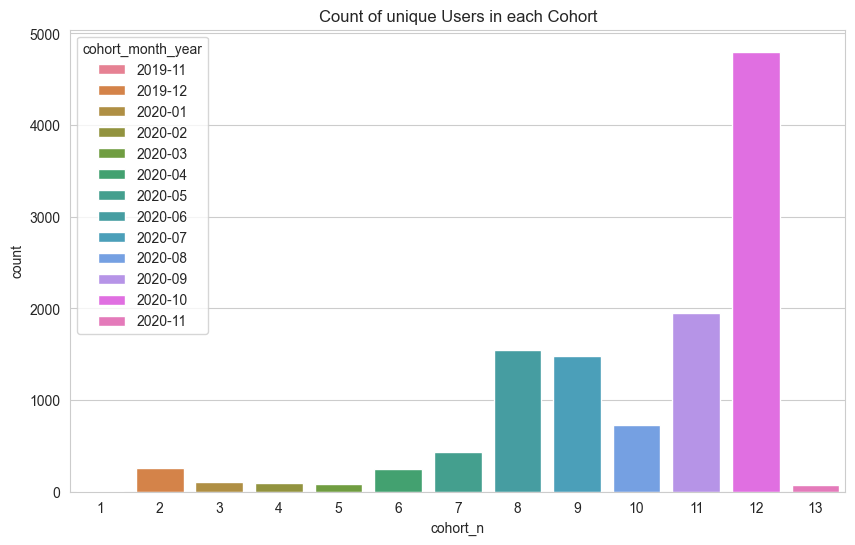

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_cash_m1_t1, x='cohort_n', hue='cohort_month_year')
plt.title("Count of unique Users in each Cohort")

Text(0.5, 1.0, 'Count of unique Users in each Cohort')

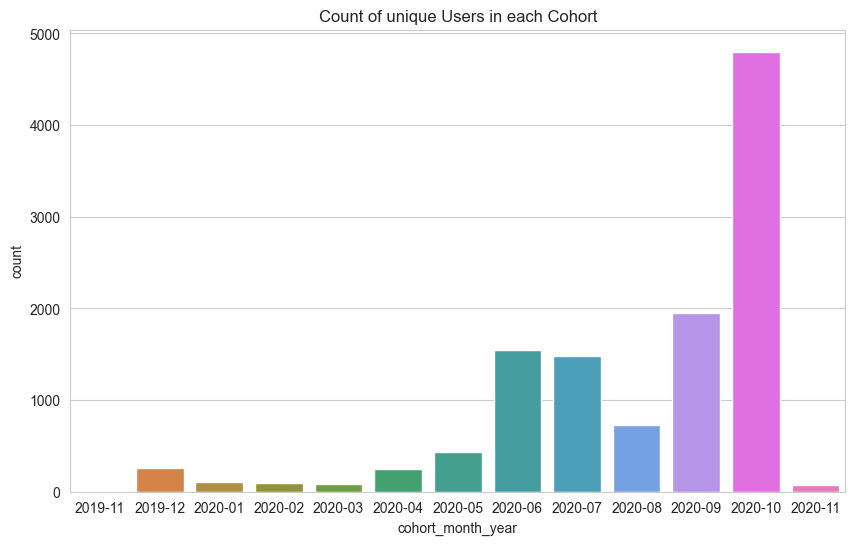

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_cash_m1_t1, x='cohort_month_year', hue='cohort_month_year')
plt.title("Count of unique Users in each Cohort")

## 1. **Frecuencia de Uso del Servicio:** Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.

In [28]:
df_cash_m1

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1,6,2020-04
1,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1,2,2019-12
2,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2,2,2019-12
3,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3,2,2019-12
4,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4,2,2019-12
...,...,...,...,...,...,...,...,...,...,...
23965,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1,13,2020-11
23966,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1,13,2020-11
23967,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1,13,2020-11
23968,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1,13,2020-11


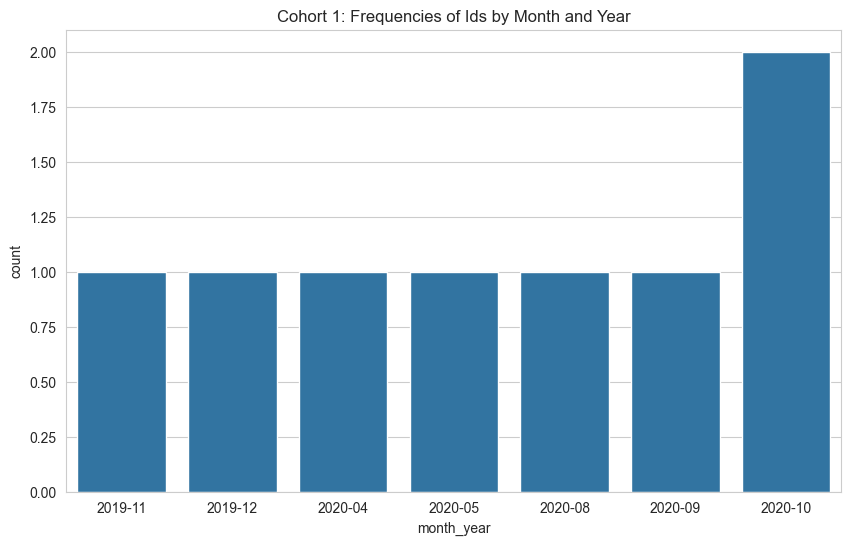

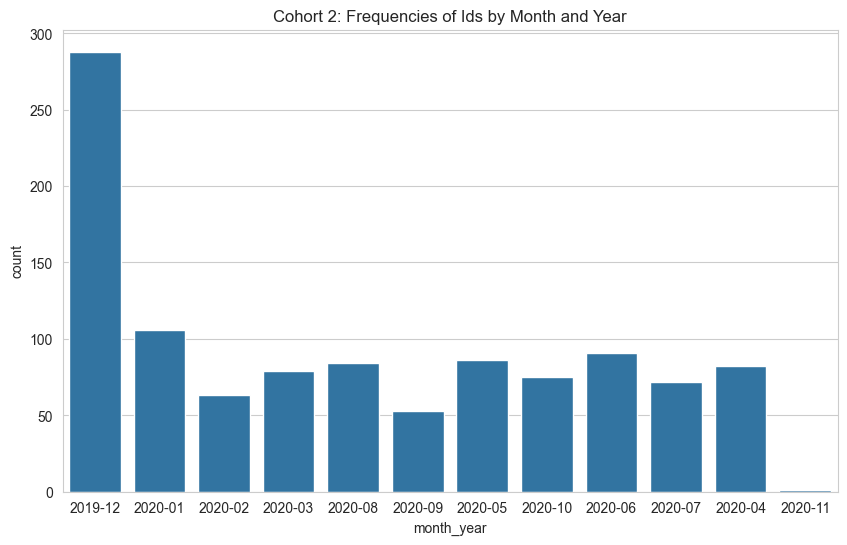

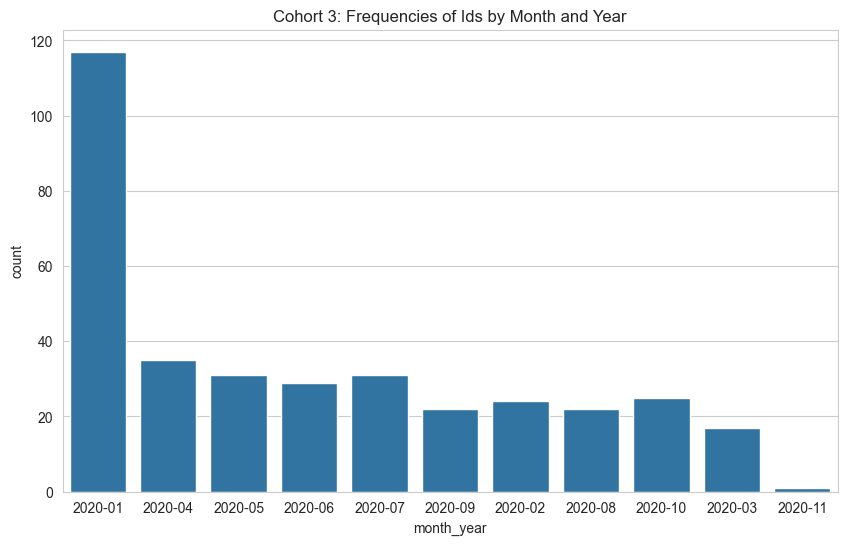

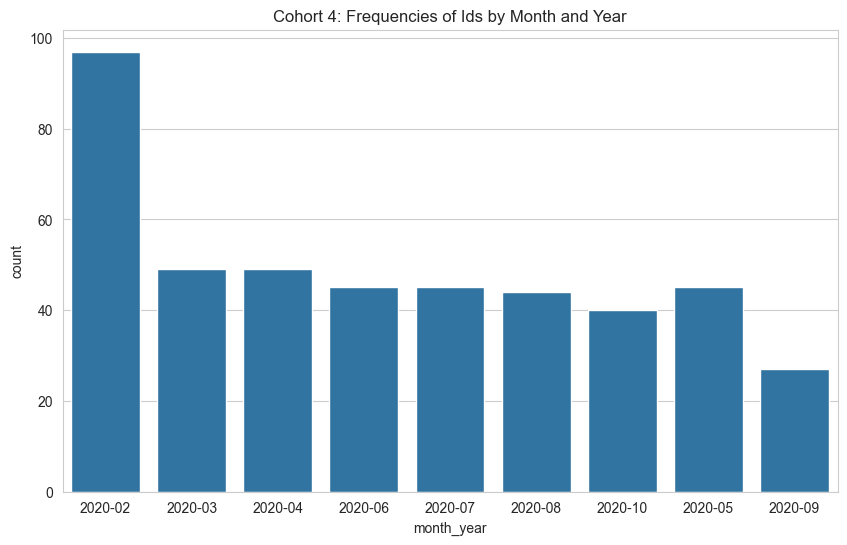

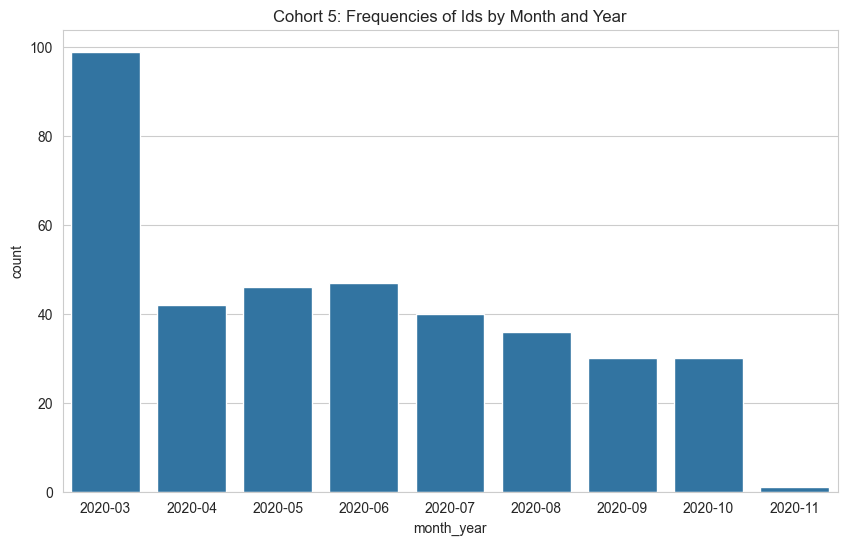

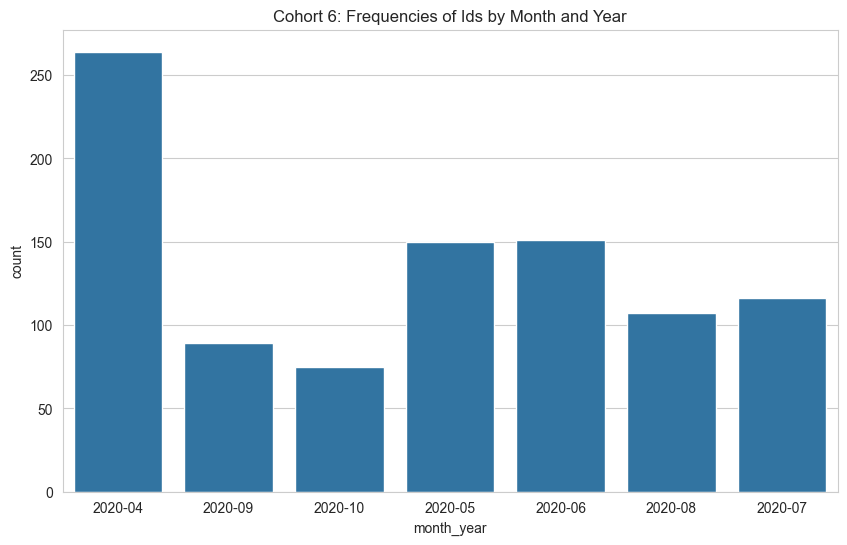

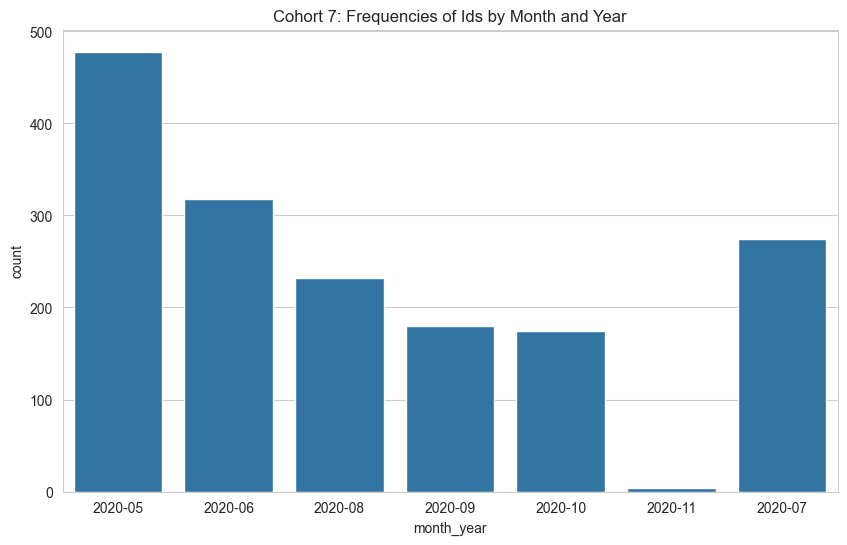

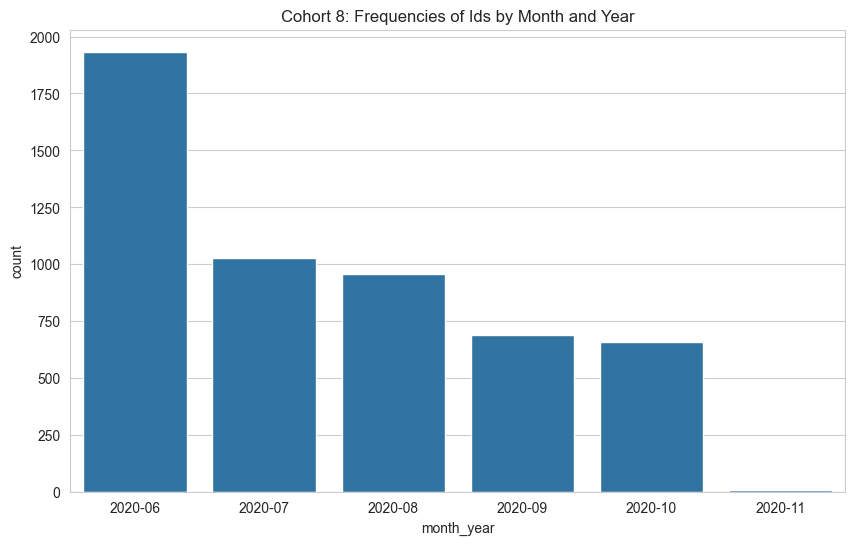

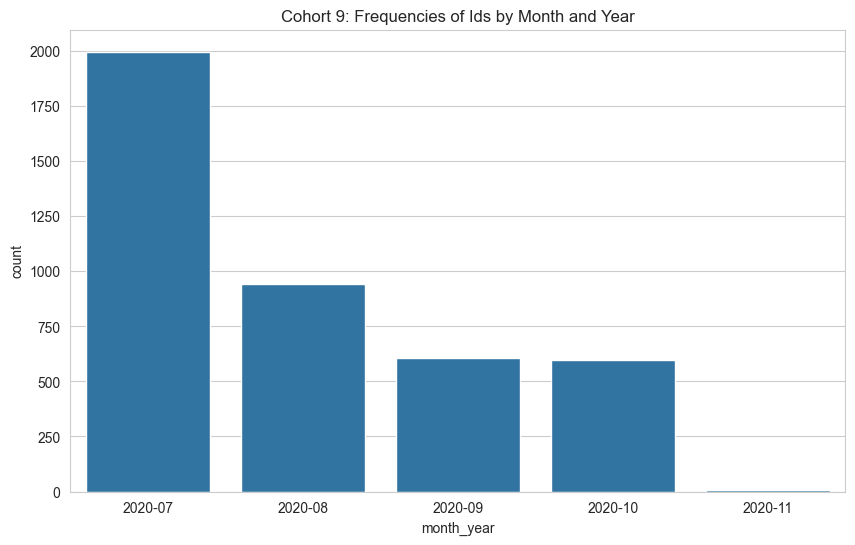

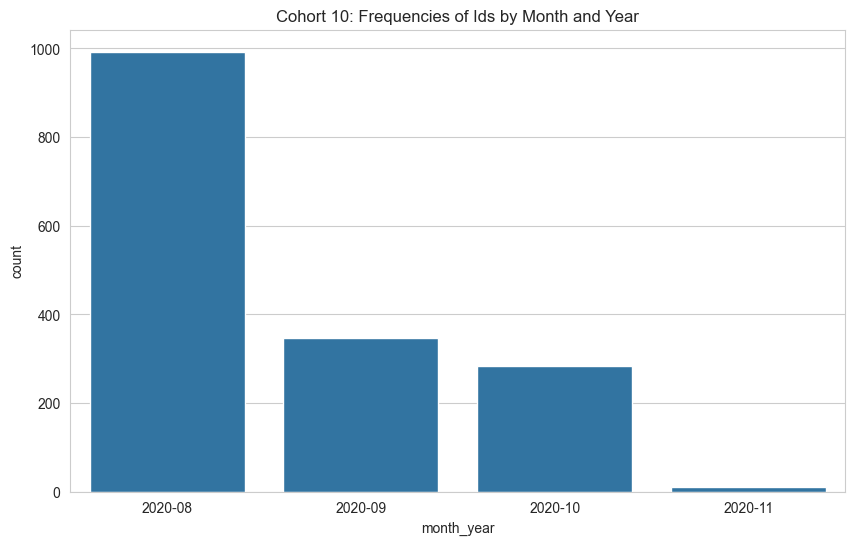

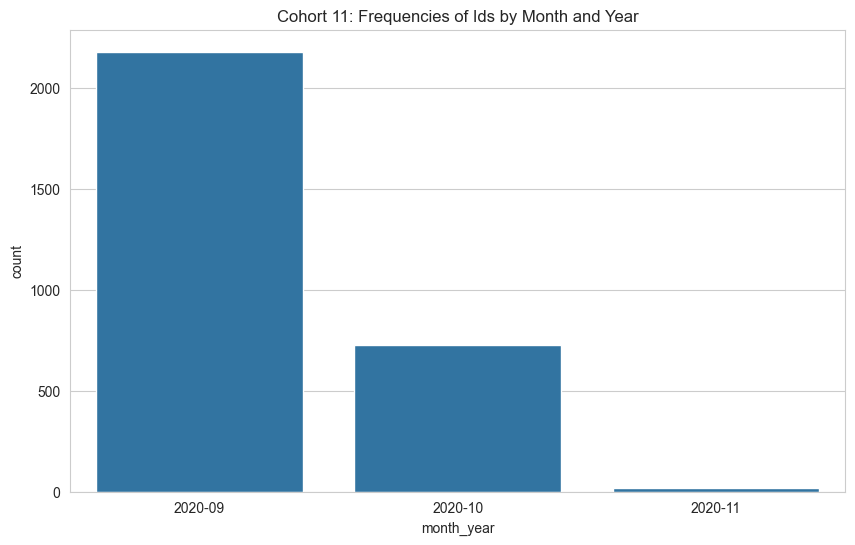

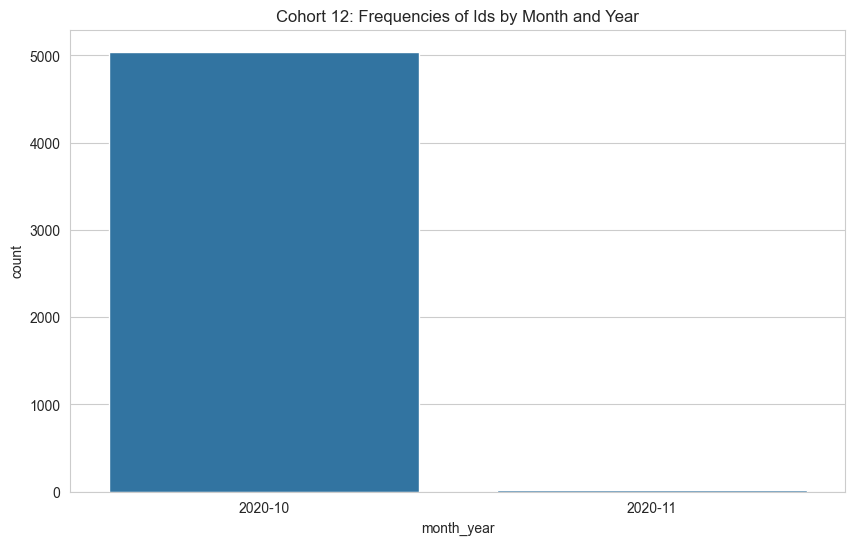

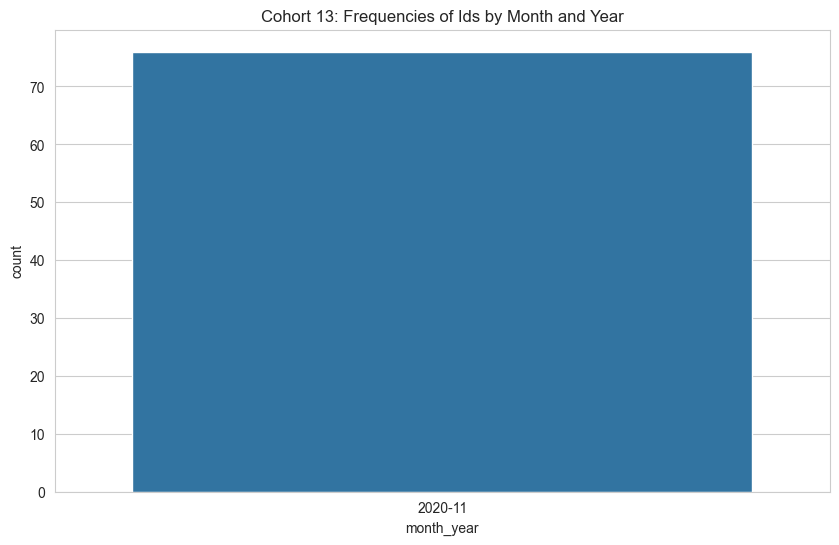

In [30]:
for key, grp in df_cash_m1.groupby('cohort_n'):
    plt.figure(figsize=(10,6))
    sns.countplot(data=grp, x='month_year')
    plt.title(f"Cohort {key}: Frequencies of Ids by Month and Year")

In [113]:
df_cash_m1_t1_cohort

,month_year,count_user_id,cohort_n,cohort_month_year
0,2019-11,1,1,2019-11
1,2019-12,254,2,2019-12
2,2020-01,106,3,2020-01
3,2020-02,90,4,2020-02
4,2020-03,86,5,2020-03
5,2020-04,246,6,2020-04
6,2020-05,432,7,2020-05
7,2020-06,1540,8,2020-06
8,2020-07,1482,9,2020-07
9,2020-08,728,10,2020-08


In [44]:
pivot_df = df_cash_m1.groupby(['cohort_n', 'month_year']).size().reset_index(name='counts')
pivot_df = pivot_df.pivot_table(index='cohort_n', columns='month_year', values='counts', fill_value=0)
pivot_df

month_year,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohort_n,,,,,,,,,,,,,
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0
2,0.0,288.0,106.0,63.0,79.0,82.0,86.0,91.0,72.0,84.0,53.0,75.0,1.0
3,0.0,0.0,117.0,24.0,17.0,35.0,31.0,29.0,31.0,22.0,22.0,25.0,1.0
4,0.0,0.0,0.0,97.0,49.0,49.0,45.0,45.0,45.0,44.0,27.0,40.0,0.0
5,0.0,0.0,0.0,0.0,99.0,42.0,46.0,47.0,40.0,36.0,30.0,30.0,1.0
6,0.0,0.0,0.0,0.0,0.0,264.0,150.0,151.0,116.0,107.0,89.0,75.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,478.0,318.0,274.0,232.0,180.0,174.0,4.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1934.0,1027.0,957.0,687.0,656.0,5.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996.0,941.0,608.0,595.0,7.0


In [126]:
pivot_df = df_cash_m1.groupby(['cohort_n', 'month_year']).size().reset_index(name='counts')
pivot_df = pivot_df.pivot_table(index='month_year', columns='cohort_n', values='counts', fill_value=0)
pivot_df

cohort_n,1,2,3,4,5,6,7,8,9,10,11,12,13
month_year,,,,,,,,,,,,,
2019-11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12,1.0,288.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01,0.0,106.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02,0.0,63.0,24.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03,0.0,79.0,17.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04,1.0,82.0,35.0,49.0,42.0,264.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05,1.0,86.0,31.0,45.0,46.0,150.0,478.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06,0.0,91.0,29.0,45.0,47.0,151.0,318.0,1934.0,0.0,0.0,0.0,0.0,0.0
2020-07,0.0,72.0,31.0,45.0,40.0,116.0,274.0,1027.0,1996.0,0.0,0.0,0.0,0.0


In [89]:
my_colors = sns.color_palette("tab20")[:13] # type: list
my_palette = sns.color_palette(my_colors) # type: seaborn.palettes._ColorPalette
my_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)]

Text(0.5, 1.0, 'Frequency of use of the service for each cohort over time')

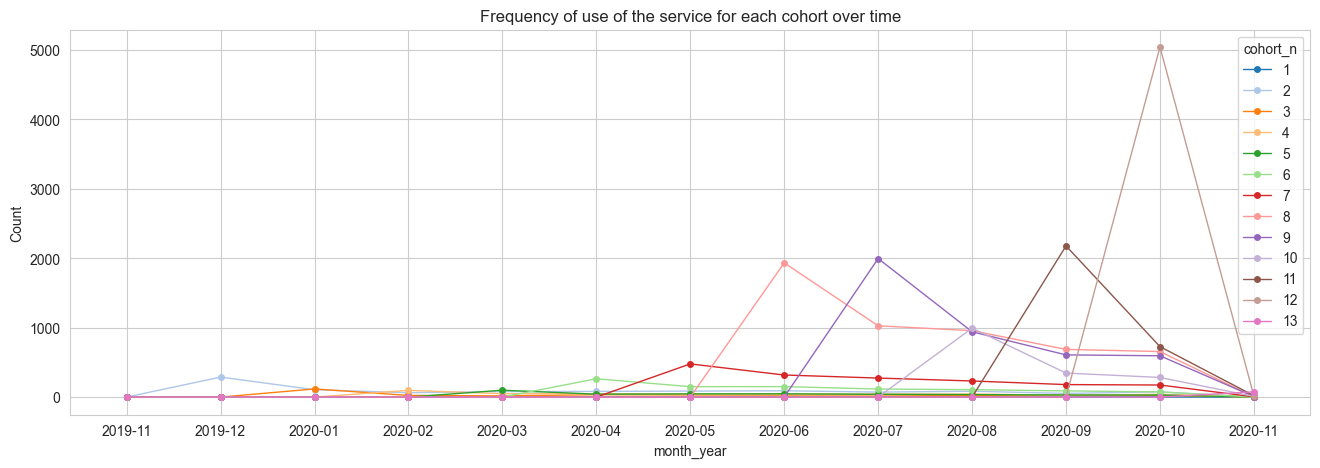

In [194]:
fig, ax = plt.subplots(1, figsize=(16,5))
pivot_df.plot(kind="line", linewidth=1, marker='o', markersize=4, color=my_palette, ax=ax)
plt.ylabel("Count")
plt.legend(title="cohort_n")
plt.xticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index)
plt.title("Frequency of use of the service for each cohort over time")

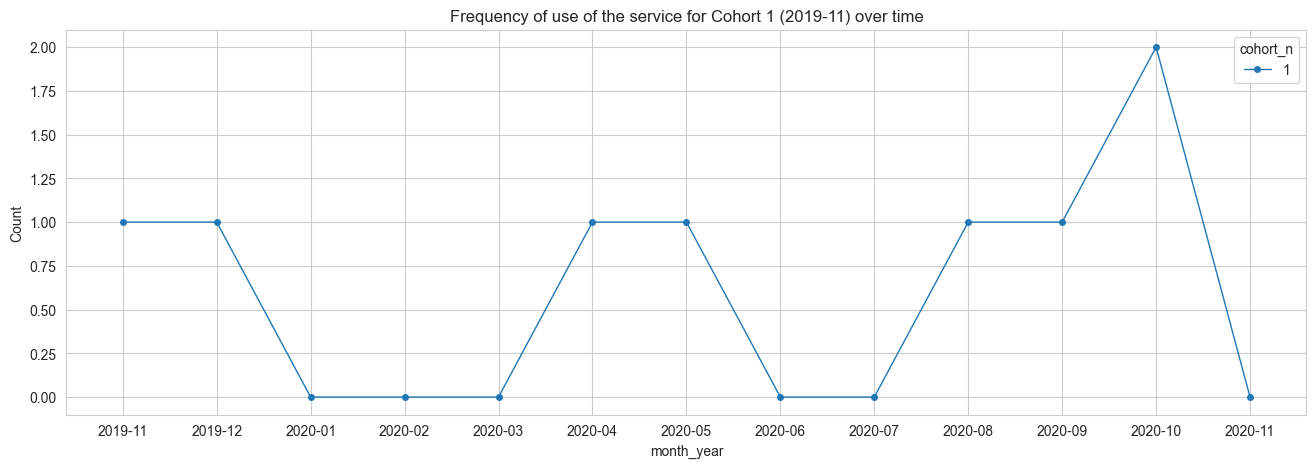

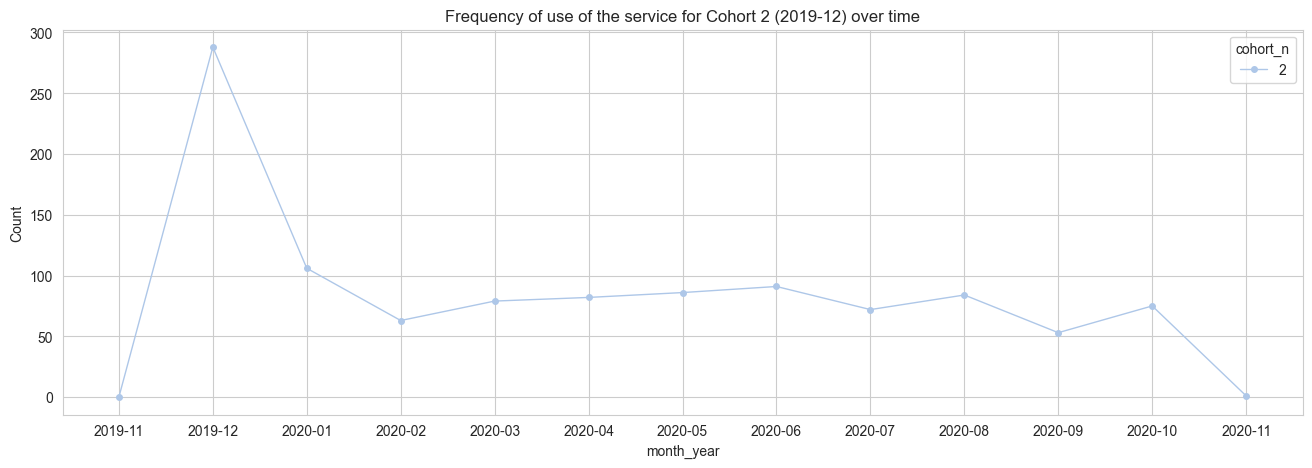

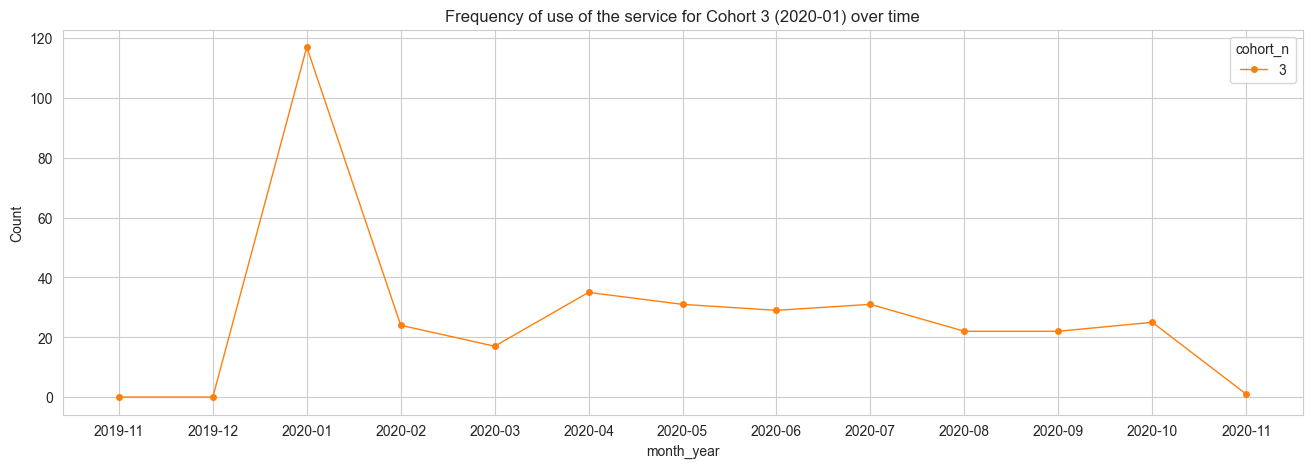

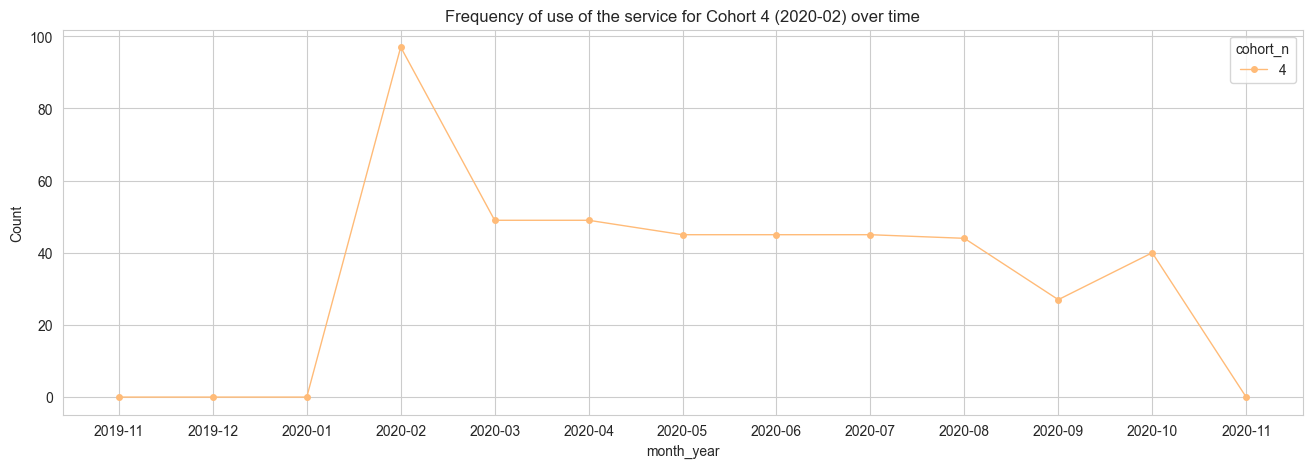

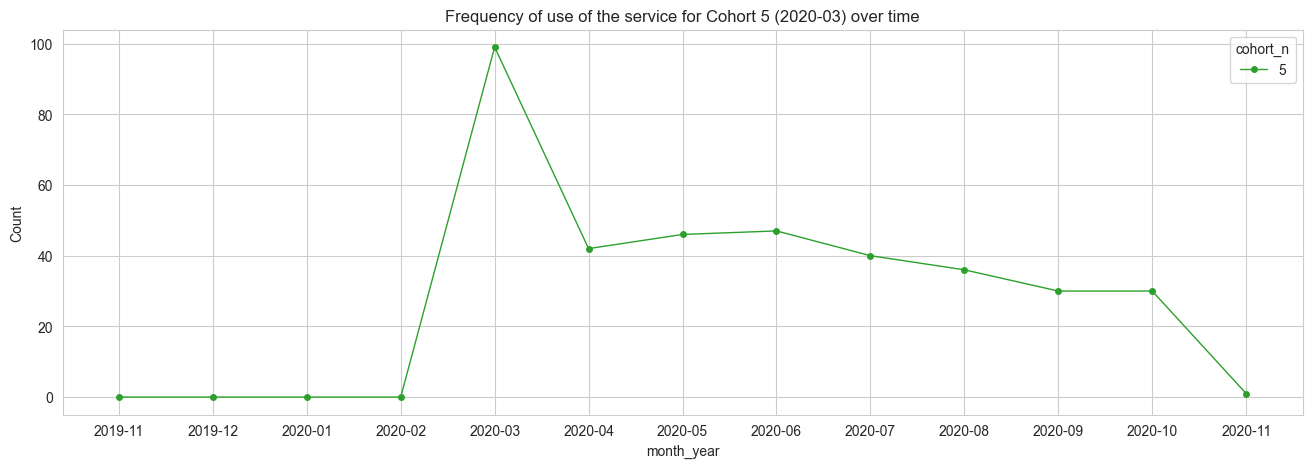

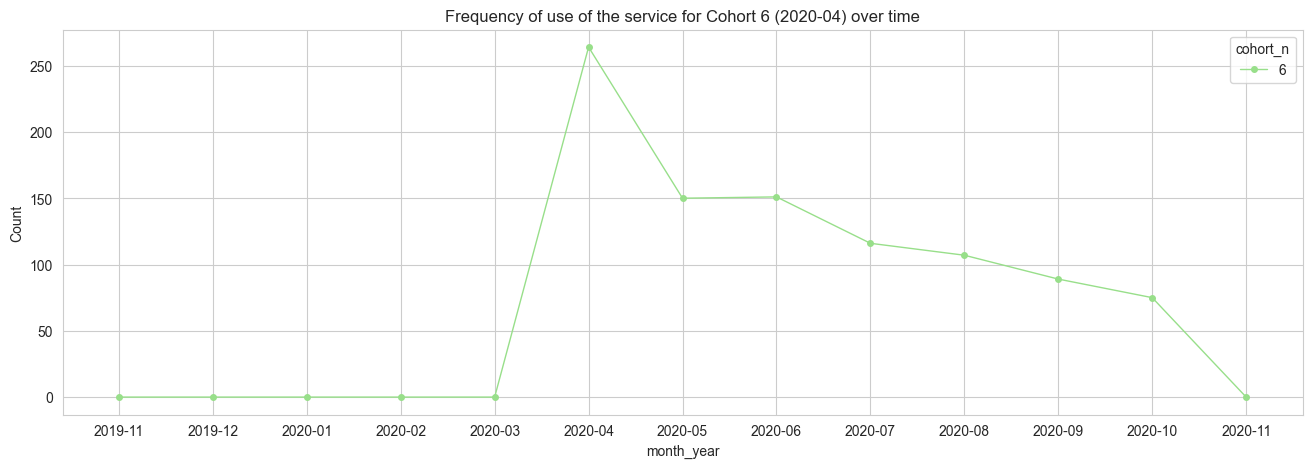

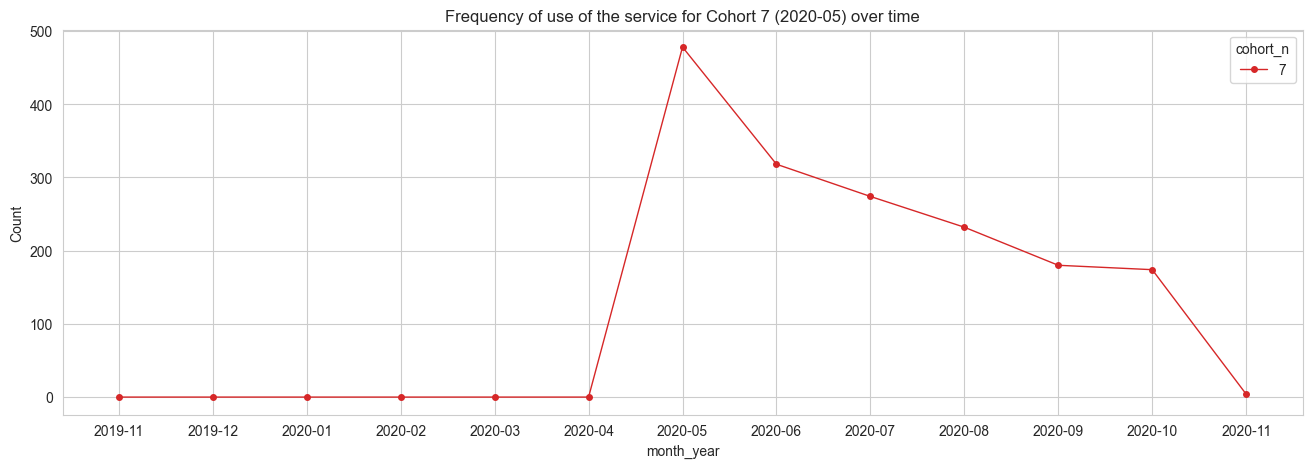

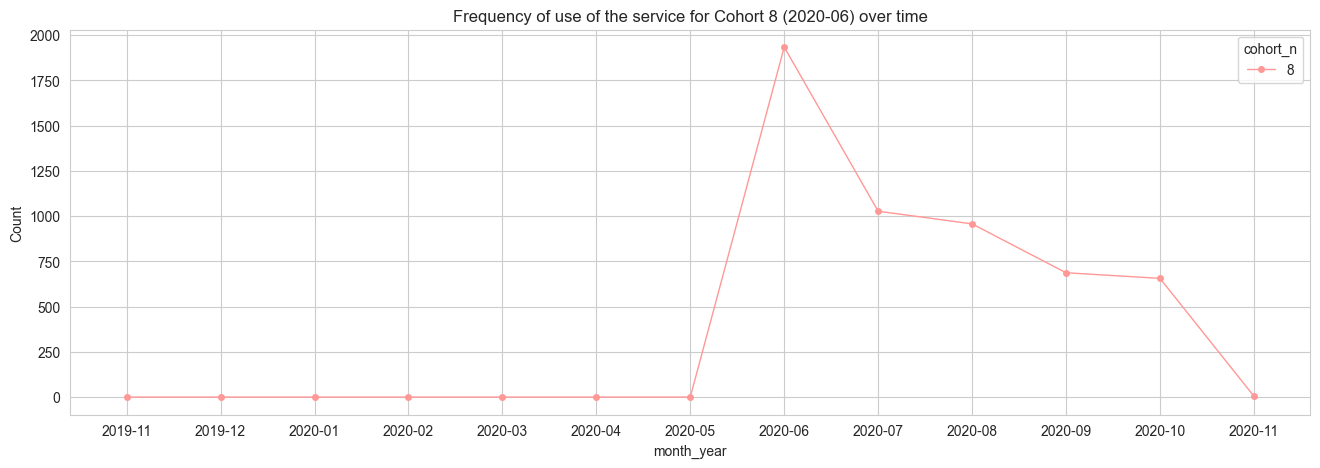

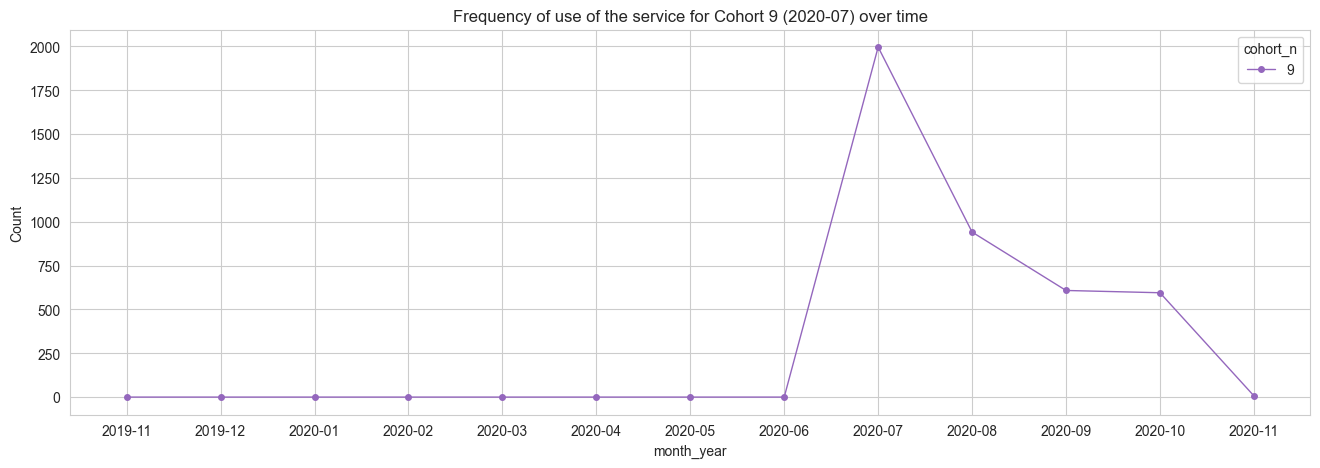

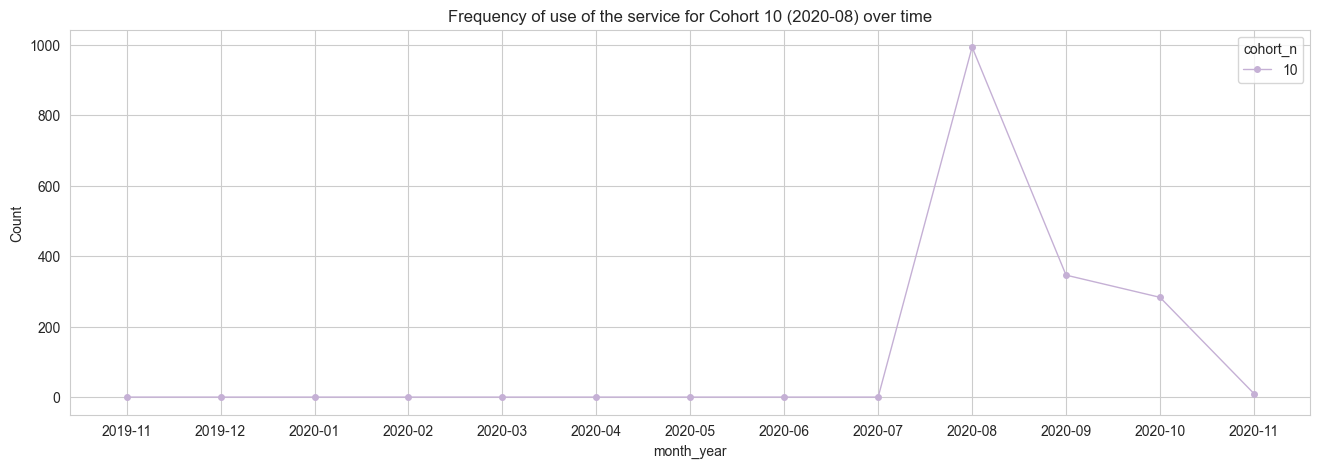

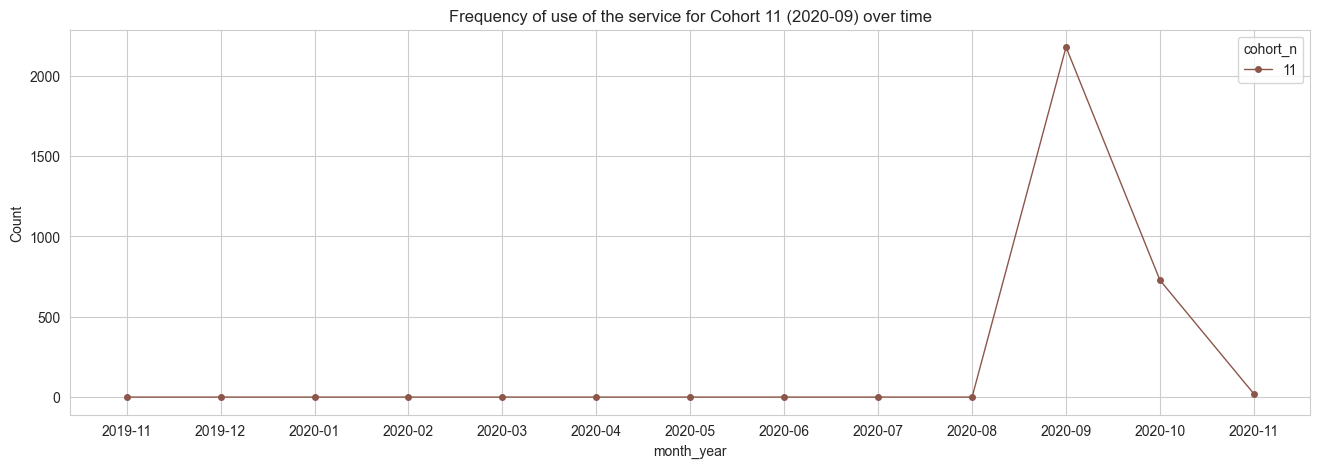

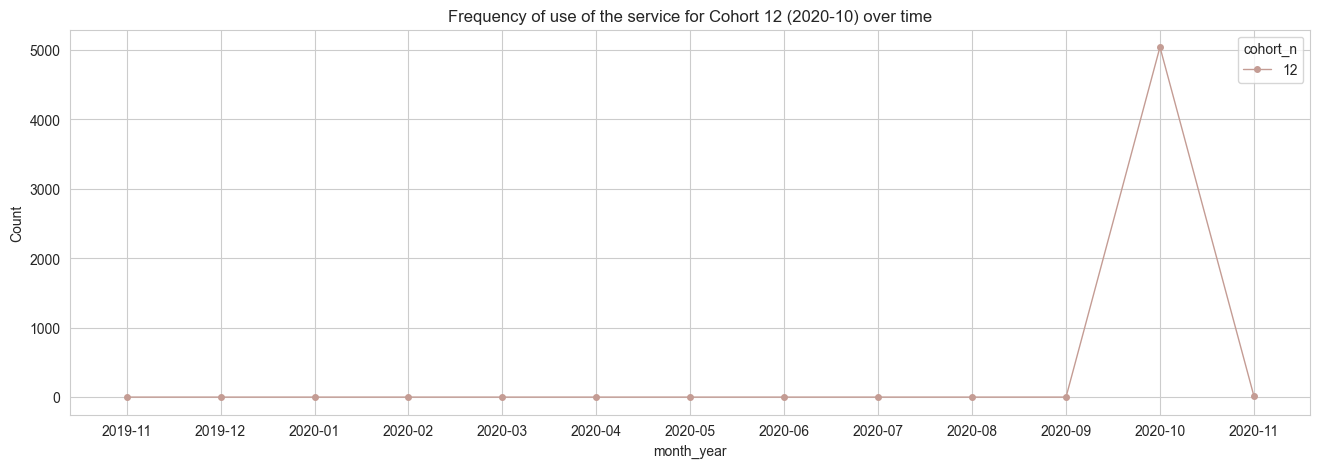

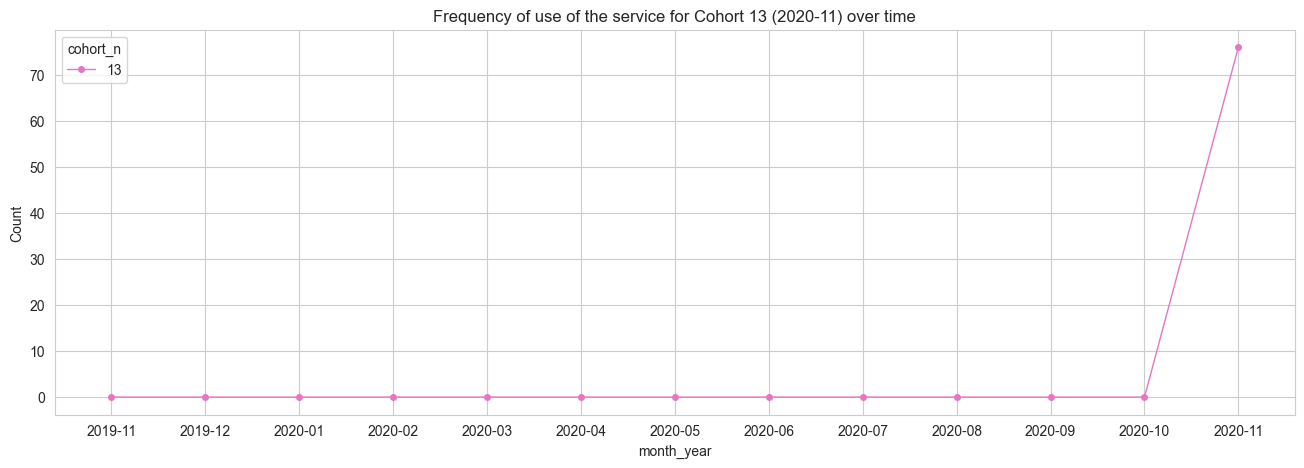

In [193]:
for col in list(pivot_df.columns):
    fig, ax = plt.subplots(1, figsize=(16,5))
    pivot_df[col].plot(kind="line", linewidth=1, marker='o', markersize=4, color=my_colors[col-1], ax=ax)
    plt.xticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index)
    plt.ylabel("Count")
    plt.legend(title="cohort_n")
    col_cohort_month_year = df_cash_m1_t1_cohort[df_cash_m1_t1_cohort.cohort_n == col]['cohort_month_year'].values[0]
    plt.title(f"Frequency of use of the service for Cohort {col} ({col_cohort_month_year}) over time")

## EDA (Exploratory Data Analysis) - df_fees

In [198]:
df_fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


### CASH Dataframe (df_fees)

In [199]:
df_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


#### Find NaN

In [200]:
#  Encontrar NaN
df_fees.isnull().sum()

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

In [203]:
# NaN user_id
df_fees[(df_fees['category'].isnull().values)]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after
5,17029,24052.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 24052,2020-10-24 12:22:27.666102+00,2020-10-24 12:22:27.666124+00,2020-11-09 19:10:14.47407+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,NaN,NaN,after


#### value_counts() and unique()

In [209]:
df_cash_m1.head()

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1,6,2020-04
1,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1,2,2019-12
2,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2,2,2019-12
3,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3,2,2019-12
4,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4,2,2019-12


In [224]:
df_fees[df_fees.charge_moment == "before"]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
9,15431,22106.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 22106,2020-10-21 08:48:50.696961+00,2020-10-21 08:48:50.696991+00,NaN,2020-11-04 22:00:00+00,2020-11-05 11:00:00+00,before
11,15434,21897.0,postpone,accepted,NaN,5.0,Postpone Cash Request 21897,2020-10-21 09:00:21.619473+00,2020-10-21 09:00:21.619504+00,2020-10-21 09:00:25.398771+00,2020-10-26 22:00:00+00,2020-10-30 23:00:00+00,before
12,20199,25490.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 25490,2020-10-30 16:51:49.45659+00,2020-10-30 16:51:49.456616+00,NaN,2020-11-06 22:00:00+00,2020-11-12 11:00:00+00,before
17,13949,19876.0,postpone,accepted,NaN,5.0,Postpone Cash Request 19876,2020-10-16 08:34:39.39839+00,2020-10-16 08:34:39.398412+00,2020-10-16 08:34:43.529531+00,2020-10-23 13:25:59.902+00,2020-11-03 23:00:00+00,before
19,19761,24564.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 24564,2020-10-29 14:00:30.956061+00,2020-10-29 14:00:30.956085+00,NaN,2020-10-29 23:00:00+00,2020-10-30 23:00:00+00,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20593,411,3891.0,postpone,accepted,NaN,5.0,Postpone Cash Request 3891,2020-06-22 08:24:47.439636+00,2021-01-20 14:46:09.980392+00,NaN,2020-07-03 22:00:00+00,2020-07-18 22:00:00+00,before
20597,1022,2717.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2717,2020-07-04 10:05:48.68153+00,2021-01-20 16:59:23.745182+00,2020-07-04 10:05:52+00,2020-07-07 22:00:00+00,2020-08-04 22:00:00+00,before
20605,681,3716.0,postpone,accepted,NaN,5.0,Postpone Cash Request 3716,2020-06-26 15:13:10.276716+00,2021-01-21 15:47:52.053382+00,2020-06-26 15:13:45+00,2020-07-20 22:00:00+00,2020-08-04 22:00:00+00,before
20607,4561,10801.0,postpone,accepted,NaN,5.0,Postpone Cash Request 10801,2020-08-21 11:28:54.470364+00,2021-01-21 16:54:46.995586+00,2020-08-21 11:29:00+00,2020-09-08 10:00:00+00,2020-10-07 10:00:00+00,before


In [204]:
for col in df_fees.columns:
    print(f"'{col}' value_counts: {df_fees[col].value_counts()}")
    print(f"'{col}' unique: {df_fees[col].unique()}")
    print(f"'{col}' len(unique): {len(df_fees[col].unique())}\n")

'id' value_counts: id
13301    1
6537     1
6961     1
16296    1
20775    1
        ..
15431    1
20539    1
14187    1
19956    1
17029    1
Name: count, Length: 21061, dtype: int64
'id' unique: [ 6537  6961 16296 ... 18779 16542 13301]
'id' len(unique): 21061

'cash_request_id' value_counts: cash_request_id
12225.0    35
5006.0     28
4410.0     24
12452.0    23
11376.0    21
           ..
22634.0     1
26270.0     1
26178.0     1
20717.0     1
25527.0     1
Name: count, Length: 12933, dtype: int64
'cash_request_id' unique: [14941. 11714. 23371. ... 20262. 26764. 25331.]
'cash_request_id' len(unique): 12934

'type' value_counts: type
instant_payment    11099
postpone            7766
incident            2196
Name: count, dtype: int64
'type' unique: ['instant_payment' 'incident' 'postpone']
'type' len(unique): 3

'status' value_counts: status
accepted     14841
cancelled     4938
rejected      1194
confirmed       88
Name: count, dtype: int64
'status' unique: ['rejected' 'accepted' 'c

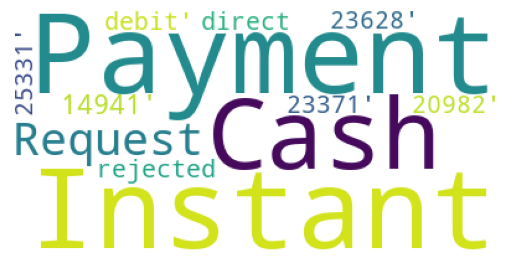

In [232]:
from wordcloud import WordCloud

text = df_fees['reason'].values 
wordcloud = WordCloud(background_color='white').generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [220]:
df_fees[['type', 'from_date', 'to_date']].value_counts(sort=False)
# Son todas postpone

type      from_date               to_date                   
postpone  2020-05-27 22:00:00+00  2020-06-11 22:00:00+00        1
                                  2020-06-27 03:49:38.153+00    1
                                  2020-06-27 10:04:21.934+00    2
                                  2020-06-27 10:23:18.784+00    1
                                  2020-06-27 10:26:44+00        1
                                                               ..
          2020-12-04 11:00:00+00  2020-12-10 11:00:00+00        1
                                  2021-01-03 11:00:00+00        1
          2020-12-04 22:00:00+00  2021-01-01 23:00:00+00        1
          2020-12-18 22:00:00+00  2021-01-02 22:00:00+00        1
          2021-01-02 22:00:00+00  2021-01-17 22:00:00+00        1
Name: count, Length: 3674, dtype: int64

In [221]:
df_fees[['type', 'category']].value_counts(sort=False)

type      category              
incident  month_delay_on_payment     597
          rejected_direct_debit     1599
Name: count, dtype: int64

In [217]:
df_fees[['type', 'status']].value_counts(sort=False)

type             status   
incident         accepted      1560
                 cancelled       97
                 confirmed       19
                 rejected       520
instant_payment  accepted     10296
                 cancelled       61
                 confirmed       69
                 rejected       673
postpone         accepted      2985
                 cancelled     4780
                 rejected         1
Name: count, dtype: int64

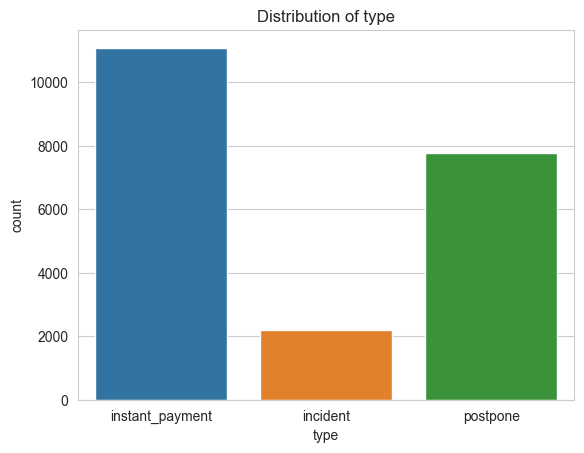

In [225]:
sns.countplot(data=df_fees, x='type', hue='type', palette='tab10')
plt.title("Distribution of type")
plt.show()

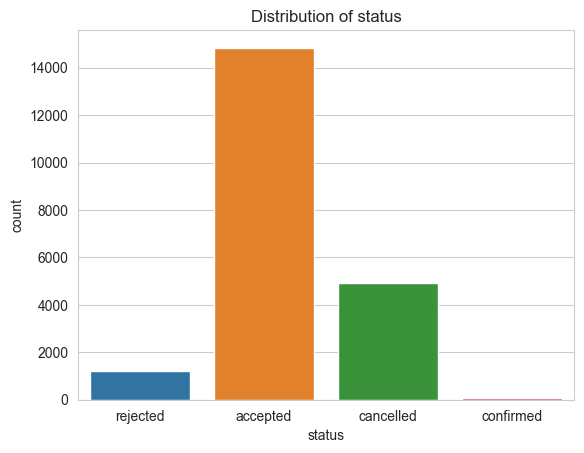

In [227]:
sns.countplot(data=df_fees, x='status', hue='status', palette='tab10')
plt.title("Distribution of status")
plt.show()

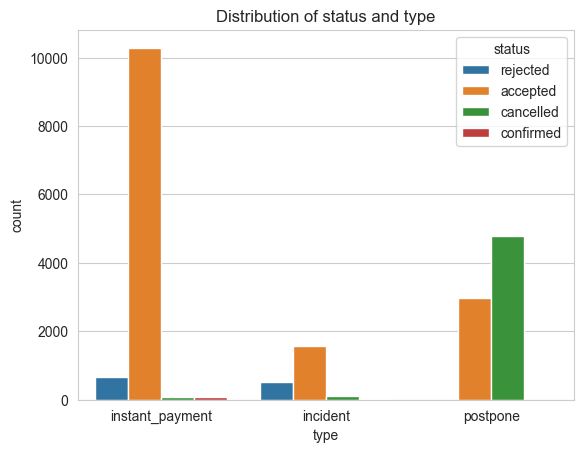

In [229]:
sns.countplot(data=df_fees, x='type', hue='status', palette='tab10')
plt.title("Distribution of status and type")
plt.show()

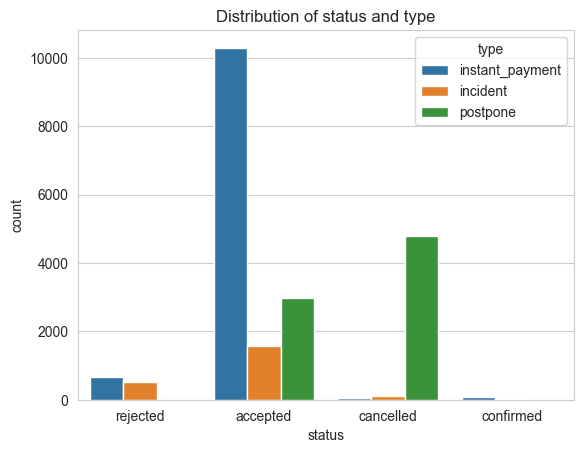

In [230]:
sns.countplot(data=df_fees, x='status', hue='type', palette='tab10')
plt.title("Distribution of status and type")
plt.show()

## 2. **Tasa de Incidentes:** Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.

In [ ]:
df_fees['created_at'] = pd.to_datetime(df_fees['created_at'])
df_fees['updated_at'] = pd.to_datetime(df_fees['updated_at'])
df_fees['paid_at'] = pd.to_datetime(df_fees['paid_at']) #--> tiene NaN

ValueError: time data "2020-11-05 15:46:08+00" doesn't match format "%Y-%m-%d %H:%M:%S.%f%z", at position 199. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [254]:
df_cash_m2 = df_cash_m1.copy()
df_cash_m2

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1,6,2020-04
1,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1,2,2019-12
2,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2,2,2019-12
3,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3,2,2019-12
4,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4,2,2019-12
...,...,...,...,...,...,...,...,...,...,...
23965,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1,13,2020-11
23966,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1,13,2020-11
23967,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1,13,2020-11
23968,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1,13,2020-11


In [255]:
df_cash_m2.dtypes

id                                 int64
new_user_id                        int64
status                            object
created_at           datetime64[ns, UTC]
month_year                        object
month_name                        object
year                               int32
n_transaction                      int64
cohort_n                           int64
cohort_month_year                 object
dtype: object

In [256]:
df_fees.dtypes

id                   int64
cash_request_id    float64
type                object
status              object
category            object
total_amount       float64
reason              object
created_at          object
updated_at          object
paid_at             object
from_date           object
to_date             object
charge_moment       object
dtype: object

In [257]:
df_fees[df_fees['cash_request_id'].isnull().values]
# No hay manera de identificar estas fees, ya que tienen cash_request_id, por ello hacemos un dropna para quitar los NaN

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1911,2990,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11164,2020-08-06 22:42:34.525373+00,2020-11-04 16:01:17.296048+00,NaN,NaN,NaN,after
1960,3124,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11444,2020-08-08 06:33:06.244651+00,2020-11-04 16:01:08.332978+00,NaN,NaN,NaN,after
4605,5185,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11788,2020-08-26 09:39:37.362933+00,2020-11-04 16:01:36.492576+00,NaN,NaN,NaN,after
11870,3590,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 12212,2020-08-12 14:20:06.657075+00,2020-11-04 16:01:53.106416+00,NaN,NaN,NaN,after


In [258]:
df_fees.dropna(subset='cash_request_id', inplace=True)
df_fees

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,NaN,NaN,after


In [259]:
df_fees['cash_request_id'] = df_fees['cash_request_id'].astype(int)
df_fees.dtypes

id                   int64
cash_request_id      int64
type                object
status              object
category            object
total_amount       float64
reason              object
created_at          object
updated_at          object
paid_at             object
from_date           object
to_date             object
charge_moment       object
dtype: object

In [266]:
# Necesitamos reimbursement_date para la metrica 2, así rellenaremos los paid_at NaN de after. Los paid_at de before irán rellenados con created at.

In [275]:
df_cash[['new_user_id','id','reimbursement_date']]

,new_user_id,id,reimbursement_date
0,804,5,2020-01-09 19:05:21.596363+00
1,231,70,2020-01-09 19:50:12.34778+00
2,191,7,2020-01-09 19:13:35.825041+00
3,761,10,2020-01-09 19:16:10.879606+00
4,7686,1594,2020-06-05 22:00:00+00
...,...,...,...
23965,13681,20616,2021-02-06 11:00:00+00
23966,30367,25243,2020-11-03 22:00:00+00
23967,82122,22357,2021-02-05 11:00:00+00
23968,64517,20256,2021-02-05 11:00:00+00


In [283]:
df_merged = pd.merge(df_fees, df_cash[['new_user_id','id', 'reimbursement_date']], left_on='cash_request_id', right_on='id', suffixes=('_fees', '_cash'))
df_merged.head()

,id_fees,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,new_user_id,id_cash,reimbursement_date
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.47011+00,NaN,NaN,after,35661,14941,2020-10-01 22:00:00+00
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.45908+00,NaN,NaN,after,16158,11714,2020-09-07 22:00:00+00
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.43291+00,NaN,NaN,after,81575,23371,2020-11-04 22:00:00+00
3,20775,26772,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00,NaN,NaN,after,94393,26772,2020-11-11 23:51:00+00
4,11242,19350,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00,NaN,NaN,after,19005,19350,2020-10-30 11:00:00+00


In [284]:
df_cash_m2[['id', 'month_year', 'month_name', 'year', 'n_transaction', 'cohort_n', 'cohort_month_year']]

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1,6,2020-04
1,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1,2,2019-12
2,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2,2,2019-12
3,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3,2,2019-12
4,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4,2,2019-12
...,...,...,...,...,...,...,...,...,...,...
23965,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1,13,2020-11
23966,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1,13,2020-11
23967,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1,13,2020-11
23968,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1,13,2020-11


In [286]:
df_cash_m2.columns

Index(['id', 'new_user_id', 'status', 'created_at', 'month_year', 'month_name',
       'year', 'n_transaction', 'cohort_n', 'cohort_month_year'],
      dtype='object')

In [285]:
df_merged.head()

,id_fees,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,new_user_id,id_cash,reimbursement_date
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.47011+00,NaN,NaN,after,35661,14941,2020-10-01 22:00:00+00
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.45908+00,NaN,NaN,after,16158,11714,2020-09-07 22:00:00+00
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.43291+00,NaN,NaN,after,81575,23371,2020-11-04 22:00:00+00
3,20775,26772,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00,NaN,NaN,after,94393,26772,2020-11-11 23:51:00+00
4,11242,19350,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00,NaN,NaN,after,19005,19350,2020-10-30 11:00:00+00


In [291]:
df_cash_m2_merged = pd.merge(df_merged, 
         df_cash_m2[['id', 'month_year', 'month_name', 'year', 'n_transaction', 'cohort_n', 'cohort_month_year']],
         left_on='cash_request_id', right_on='id')
df_cash_m2_merged

,id_fees,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,...,new_user_id,id_cash,reimbursement_date,id,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.47011+00,...,35661,14941,2020-10-01 22:00:00+00,14941,2020-09,September,2020,1,11,2020-09
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.45908+00,...,16158,11714,2020-09-07 22:00:00+00,11714,2020-08,August,2020,3,8,2020-06
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.43291+00,...,81575,23371,2020-11-04 22:00:00+00,23371,2020-10,October,2020,1,12,2020-10
3,20775,26772,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00,...,94393,26772,2020-11-11 23:51:00+00,26772,2020-10,October,2020,1,12,2020-10
4,11242,19350,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00,...,19005,19350,2020-10-30 11:00:00+00,19350,2020-10,October,2020,5,8,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21052,12372,20262,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00:00,2020-10-13 14:25:04.180490+00:00,2020-11-17 05:14:00.080854+00,...,64923,20262,2020-11-10 11:00:00+00,20262,2020-10,October,2020,1,12,2020-10
21053,20768,26764,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00:00,2020-10-31 15:24:18.680715+00:00,2020-12-16 07:10:54.697639+00,...,100564,26764,2020-11-10 23:51:00+00,26764,2020-10,October,2020,1,12,2020-10
21054,18779,25331,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00:00,2020-10-27 17:28:51.749200+00:00,2020-11-18 04:35:42.915511+00,...,70754,25331,2020-11-10 23:51:00+00,25331,2020-10,October,2020,1,12,2020-10
21055,16542,23628,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00:00,2020-10-23 16:27:52.047486+00:00,2020-12-18 05:18:01.465317+00,...,72437,23628,2020-11-15 11:00:00+00,23628,2020-10,October,2020,1,12,2020-10


In [292]:
df_cash_m2_merged[df_cash_m2_merged['paid_at'].isnull().values]

,id_fees,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,...,new_user_id,id_cash,reimbursement_date,id,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
9,15431,22106,postpone,cancelled,NaN,5.0,Postpone Cash Request 22106,2020-10-21 08:48:50.696961+00:00,2020-10-21 08:48:50.696991+00:00,NaN,...,77990,22106,2020-11-04 22:00:00+00,22106,2020-10,October,2020,1,12,2020-10
12,20199,25490,postpone,cancelled,NaN,5.0,Postpone Cash Request 25490,2020-10-30 16:51:49.456590+00:00,2020-10-30 16:51:49.456616+00:00,NaN,...,96903,25490,2020-11-06 22:00:00+00,25490,2020-10,October,2020,1,12,2020-10
19,19761,24564,postpone,cancelled,NaN,5.0,Postpone Cash Request 24564,2020-10-29 14:00:30.956061+00:00,2020-10-29 14:00:30.956085+00:00,NaN,...,52845,24564,2020-10-29 23:00:00+00,24564,2020-10,October,2020,2,11,2020-09
21,20530,19909,postpone,cancelled,NaN,5.0,Postpone Cash Request 19909,2020-10-31 01:49:46.485098+00:00,2020-10-31 01:49:46.485121+00:00,NaN,...,63487,19909,2020-11-03 23:51:00+00,19909,2020-10,October,2020,1,12,2020-10
29,16690,22251,postpone,cancelled,NaN,5.0,Postpone Cash Request 22251,2020-10-23 19:27:18.036963+00:00,2020-10-23 19:27:18.036987+00:00,NaN,...,81285,22251,2020-10-31 11:00:00+00,22251,2020-10,October,2020,1,12,2020-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21032,10380,13819,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-01 22:23:36.045376+00:00,2020-10-13 14:25:11.169963+00:00,NaN,...,35363,13819,2020-09-20 23:51:00+00,13819,2020-08,August,2020,3,10,2020-08
21033,20919,13819,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 11/2020,2020-10-31 23:37:08.778572+00:00,2020-10-31 23:37:08.778600+00:00,NaN,...,35363,13819,2020-09-20 23:51:00+00,13819,2020-08,August,2020,3,10,2020-08
21042,12566,8952,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-10 23:26:30.997317+00:00,2020-10-13 14:25:18.627143+00:00,NaN,...,34223,8952,2020-08-05 22:00:00+00,8952,2020-07,July,2020,1,9,2020-07
21043,13537,14289,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-14 22:35:49.950325+00:00,2020-10-14 22:35:49.950347+00:00,NaN,...,29093,14289,2020-10-02 22:00:00+00,14289,2020-09,September,2020,3,9,2020-07


Necesitamos reimbursement_date para la metrica 2, así rellenaremos los paid_at NaN de after. Los paid_at de before irán rellenados con created at.

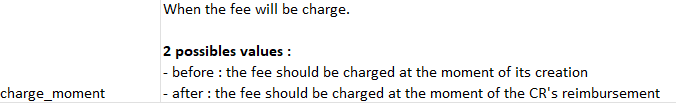

In [301]:
mask_nan_paid_before = (df_cash_m2_merged['paid_at'].isnull().values) & (df_cash_m2_merged['charge_moment'] == "before")
mask_nan_paid_after = (df_cash_m2_merged['paid_at'].isnull().values) & (df_cash_m2_merged['charge_moment'] == "after")
print("Len paid_nan_before: ", len(df_cash_m2_merged[mask_nan_paid_before]))
print("Len paid_nan_after: ", len(df_cash_m2_merged[mask_nan_paid_after]))

Len paid_nan_before:  1560
Len paid_nan_after:  3966


In [325]:
df_cash_m2_merged[['reimbursement_date']].head(20)

,reimbursement_date
0,2020-10-01 22:00:00+00
1,2020-09-07 22:00:00+00
2,2020-11-04 22:00:00+00
3,2020-11-11 23:51:00+00
4,2020-10-30 11:00:00+00
5,2020-11-09 22:00:00+00
6,2020-11-26 11:00:00+00
7,2020-10-05 22:00:00+00
8,2020-11-27 23:00:00+00
9,2020-11-04 22:00:00+00


In [353]:
series_reimbursement_date_withfloat= pd.to_datetime(df_cash_m2_merged['reimbursement_date'], format="%Y-%m-%d %H:%M:%S.%f%z", errors="coerce") # Con float
series_reimbursement_date_withfloat = series_reimbursement_date_withfloat.dt.strftime("%Y-%m-%d %H:%M:%S%z")
series_reimbursement_date_withfloat.head(15)

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
5                          NaN
6                          NaN
7                          NaN
8                          NaN
9                          NaN
10                         NaN
11                         NaN
12                         NaN
13    2020-11-15 04:30:17+0000
14                         NaN
Name: reimbursement_date, dtype: object

In [ ]:
series_reimbursement_date_withoutfloat = pd.to_datetime(df_cash_m2_merged['reimbursement_date'], format="%Y-%m-%d %H:%M:%S%z", errors="coerce") # Sin float
series_reimbursement_date_withoutfloat

In [360]:
df_cash_m2_merged['reimbursement_date'] = series_reimbursement_date_withoutfloat.fillna(series_reimbursement_date_withfloat)

In [362]:
df_cash_m2_merged['paid_at'] = df_cash_m2_merged[mask_nan_paid_before]['paid_at'].fillna(df_cash_m2_merged[mask_nan_paid_before]['created_at'])
df_cash_m2_merged['paid_at'] = df_cash_m2_merged[mask_nan_paid_after]['paid_at'].fillna(df_cash_m2_merged[mask_nan_paid_after]['reimbursement_date'])

In [366]:
df_cash_m2_merged_incident = df_cash_m2_merged[df_cash_m2_merged['type'] == 'incident']
df_cash_m2_merged_incident

,id_fees,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,...,new_user_id,id_cash,reimbursement_date,id,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,NaT,...,16158,11714,2020-09-07 22:00:00+00:00,11714,2020-08,August,2020,3,8,2020-06
7,14187,14839,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:48:50.655967+00:00,2020-10-16 23:48:50.655988+00:00,NaT,...,30659,14839,2020-10-05 22:00:00+00:00,14839,2020-09,September,2020,3,9,2020-07
15,14420,17963,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 22:18:53.924407+00:00,2020-10-17 22:18:53.924429+00:00,NaT,...,35413,17963,2020-10-05 23:51:00+00:00,17963,2020-09,September,2020,2,10,2020-08
27,14433,10287,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 22:19:48.806283+00:00,2020-10-17 22:19:48.806303+00:00,NaT,...,12710,10287,2020-10-08 10:00:00+00:00,10287,2020-07,July,2020,1,9,2020-07
40,14188,15989,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:48:52.168550+00:00,2020-10-16 23:48:52.168578+00:00,NaT,...,20129,15989,2020-10-05 22:00:00+00:00,15989,2020-09,September,2020,4,8,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,3491,8952,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-08-11 23:00:44.214576+00:00,2020-10-13 14:25:02.938088+00:00,NaT,...,34223,8952,2020-08-05 22:00:00+00:00,8952,2020-07,July,2020,1,9,2020-07
21041,7166,8952,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-11 01:37:43.458593+00:00,2020-10-13 14:25:02.546591+00:00,NaT,...,34223,8952,2020-08-05 22:00:00+00:00,8952,2020-07,July,2020,1,9,2020-07
21042,12566,8952,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-10 23:26:30.997317+00:00,2020-10-13 14:25:18.627143+00:00,2020-08-05 22:00:00+00:00,...,34223,8952,2020-08-05 22:00:00+00:00,8952,2020-07,July,2020,1,9,2020-07
21043,13537,14289,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-14 22:35:49.950325+00:00,2020-10-14 22:35:49.950347+00:00,2020-10-02 22:00:00+00:00,...,29093,14289,2020-10-02 22:00:00+00:00,14289,2020-09,September,2020,3,9,2020-07


In [377]:
df_incident_counts_m2 = df_cash_m2_merged_incident.groupby(['cohort_n']).size().reset_index(name='counts')
df_incident_counts_m2

,cohort_n,counts
0,2,53
1,3,15
2,4,24
3,5,32
4,6,119
5,7,234
6,8,776
7,9,576
8,10,149
9,11,195


C:\Users\emartin4\AppData\Local\Temp\ipykernel_28436\1501790170.py:1: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.barplot(data=df_incident_counts_m2, x='cohort_n', y='counts', hue='cohort_n', palette=my_colors[1:])


Text(0.5, 1.0, 'Incident Rate by cohort')

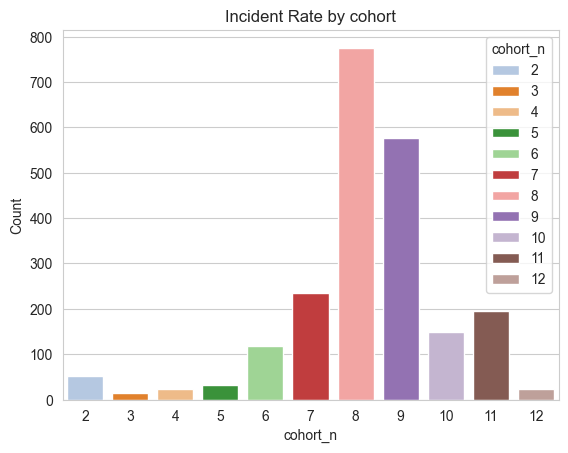

In [389]:
sns.barplot(data=df_incident_counts_m2, x='cohort_n', y='counts', hue='cohort_n', palette=my_colors[1:])
plt.ylabel("Count")
plt.title("Incident Rate by cohort")